In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("batsmens2222222.xlsx")

In [3]:
df

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against
0,Jonny Bairstow,c Mitchell b Santner,33,35,57,4,1,94.28,England,New Zealand
1,Dawid Malan,c †Latham b Henry,14,24,36,2,0,58.33,England,New Zealand
2,Joe Root,b Phillips,77,86,140,4,1,89.53,England,New Zealand
3,Harry Brook,c Conway b Ravindra,25,16,20,4,1,156.25,England,New Zealand
4,Moeen Ali,b Phillips,11,17,20,1,0,64.70,England,New Zealand
...,...,...,...,...,...,...,...,...,...,...
871,Travis Head,c Shubman Gill b Mohammed Siraj,137,120,166,15,4,114.16,Australia,India
872,Mitchell Marsh,c †Rahul b Bumrah,15,15,15,1,1,100.00,Australia,India
873,Steven Smith,lbw b Bumrah,4,9,11,1,0,44.44,Australia,India
874,Marnus Labuschagne,not out,58,110,133,4,0,52.72,Australia,India


# Cleaning

In [4]:
#handling the incorrect data

df['Batsmen'] = df['Batsmen'].apply(lambda x:x.split("†")[0])
df['Batsmen'] = df['Batsmen'].apply(lambda x:x.replace("(c)",""))

df["R"].replace("-","0",inplace=True)
df["B"].replace("-","0",inplace=True)
df["M"].replace("-","0",inplace=True)
df["4s"].replace("-","0",inplace=True)
df["6s"].replace("-","0",inplace=True)
df["SR"].replace("-","0",inplace=True)

In [5]:
#converting datatype of columns for numeric analysis

df[['R','B','M','4s','6s']] = df[['R','B','M','4s','6s']].astype(int)
df['SR'] = df['SR'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Batsmen  876 non-null    object 
 1   Out-by   876 non-null    object 
 2   R        876 non-null    int32  
 3   B        876 non-null    int32  
 4   M        876 non-null    int32  
 5   4s       876 non-null    int32  
 6   6s       876 non-null    int32  
 7   SR       876 non-null    float64
 8   Team     876 non-null    object 
 9   Against  876 non-null    object 
dtypes: float64(1), int32(5), object(4)
memory usage: 51.5+ KB


In [7]:
df[df['Batsmen'] == "Virat Kohli"].sum()

Batsmen      0
Out-by       0
R            0
B            0
M            0
4s           0
6s           0
SR         0.0
Team         0
Against      0
dtype: object

In [8]:
#removing unwanted spaces in all string columns

df['Batsmen'] = df['Batsmen'].apply(lambda x: x.strip())
df['Out-by'] = df['Out-by'].apply(lambda x: x.strip())
df['Team'] = df['Team'].apply(lambda x: x.strip())
df['Against'] = df['Against'].apply(lambda x: x.strip())

In [9]:
#creating a new column "Boundary Percentage"

def boundary_percentage(x):
    boundary = 4 * x['4s'] + 6 * x['6s']
    
    if x['R'] == 0:
        return 0  # Avoid division by zero
    
    percentage = (boundary / x['R']) * 100
    return percentage

df['Boundary Percentage'] = df.apply(boundary_percentage, axis=1)

In [10]:
df['Bowled-by'] = df['Out-by'].apply(lambda x:x.split(" b ")[len(x.split(" b "))-1])

# Analysis

In [11]:
#finding all innings score of a batsmen eg.Virat Kohli

virat_data = df[ df['Batsmen'] == "Virat Kohli"]
virat_data

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
84,Virat Kohli,c Labuschagne b Hazlewood,85,116,171,6,0,73.27,India,Australia,28.235294,Hazlewood
158,Virat Kohli,not out,55,56,64,6,0,98.21,India,Afghanistan,43.636364,not out
209,Virat Kohli,c Mohammad Nawaz b Hasan Ali,16,18,31,3,0,88.88,India,Pakistan,75.000000,Hasan Ali
304,Virat Kohli,not out,103,97,113,6,4,106.18,India,Bangladesh,46.601942,not out
380,Virat Kohli,c Phillips b Henry,95,104,154,8,2,91.34,India,New Zealand,46.315789,Henry
520,Virat Kohli,c Stokes b Willey,0,9,12,0,0,0.00,India,England,0.000000,Willey
590,Virat Kohli,c Nissanka b Madushanka,88,94,139,11,0,93.61,India,Sri Lanka,50.000000,Madushanka
659,Virat Kohli,not out,101,121,195,10,0,83.47,India,South Africa,39.603960,not out
807,Virat Kohli,b van der Merwe,51,56,69,5,1,91.07,India,Netherlands,50.980392,b van der Merwe
824,Virat Kohli,c Conway b Southee,117,113,149,9,2,103.53,India,New Zealand,41.025641,Southee


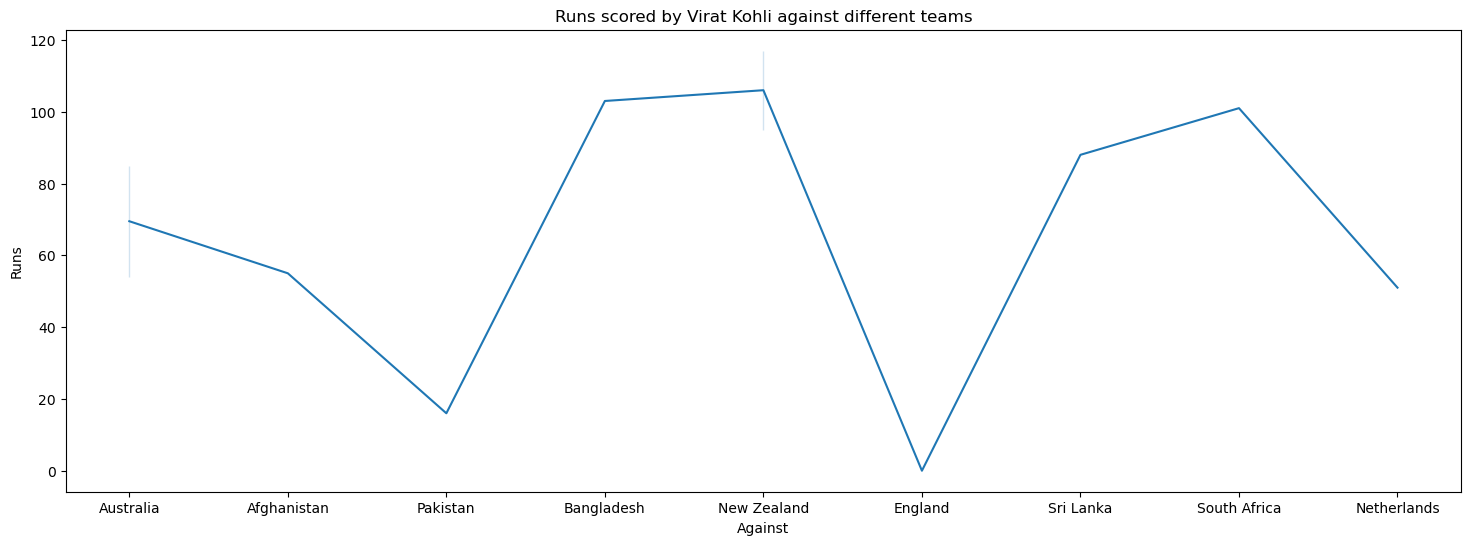

In [12]:
#tracking the performance of a player (Runs) 

plt.figure(figsize=(18,6))
sns.lineplot(data=virat_data, x='Against', y='R')
plt.xlabel('Against')
plt.ylabel('Runs')
plt.title('Runs scored by Virat Kohli against different teams')
plt.show()

In [13]:
rohit = df[ df['Batsmen'] == "Rohit Sharma"]
rohit

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
82,Rohit Sharma,lbw b Hazlewood,0,6,10,0,0,0.00,India,Australia,0.000000,Hazlewood
156,Rohit Sharma,b Rashid Khan,131,84,111,16,5,155.95,India,Afghanistan,71.755725,b Rashid Khan
207,Rohit Sharma,c Iftikhar Ahmed b Shaheen Shah Afridi,86,63,91,6,6,136.50,India,Pakistan,69.767442,Shaheen Shah Afridi
302,Rohit Sharma,c Towhid Hridoy b Hasan Mahmud,48,40,51,7,2,120.00,India,Bangladesh,83.333333,Hasan Mahmud
378,Rohit Sharma,b Ferguson,46,40,44,4,4,115.00,India,New Zealand,86.956522,b Ferguson
518,Rohit Sharma,c Livingstone b Rashid,87,101,162,10,3,86.13,India,England,66.666667,Rashid
588,Rohit Sharma,b Madushanka,4,2,2,1,0,200.00,India,Sri Lanka,100.000000,b Madushanka
657,Rohit Sharma,c Bavuma b Rabada,40,24,32,6,2,166.66,India,South Africa,90.000000,Rabada
805,Rohit Sharma,c Barresi b de Leede,61,54,74,8,2,112.96,India,Netherlands,72.131148,de Leede
822,Rohit Sharma,c Williamson b Southee,47,29,40,4,4,162.06,India,New Zealand,85.106383,Southee


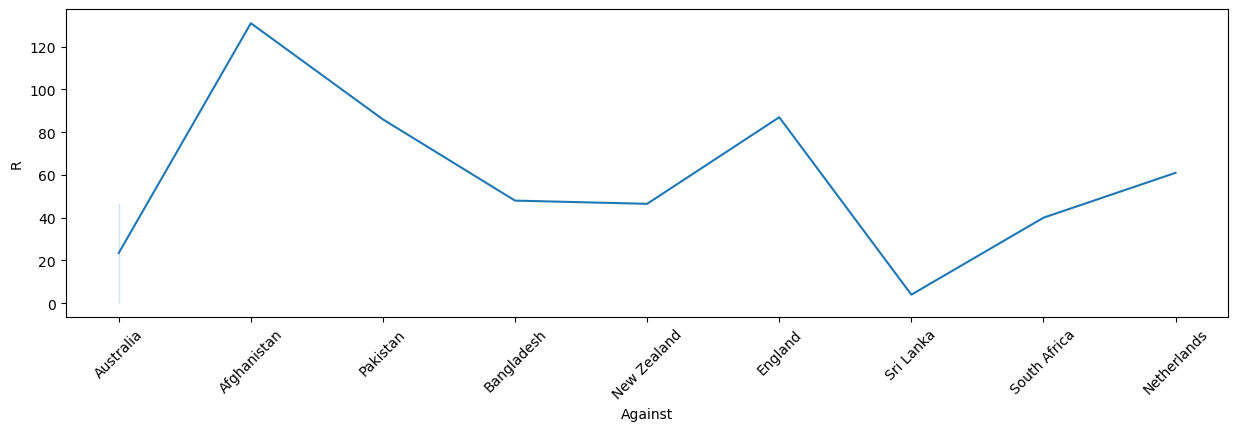

In [14]:
plt.figure(figsize=(15,4))
sns.lineplot(data=rohit,y="R",x="Against",)
plt.xticks(rotation=45)
plt.show()

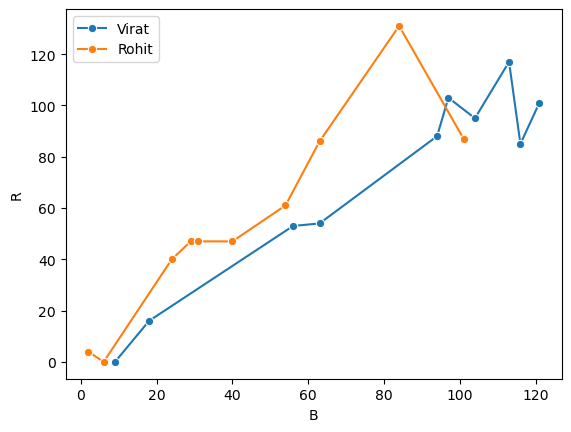

In [15]:
#comparing performance of two players

sns.lineplot(data=virat_data,x="B",y="R",label="Virat",marker="o")
sns.lineplot(data=rohit,x="B",y="R",label="Rohit",marker="o")
plt.show()

**From this we can say that VIRAT Kohli played runner ball games in almost all matches**

In [16]:
#player who scored century in the tournament

centuries = df[df['R']>100]
centuries

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
11,Devon Conway,not out,152,121,147,19,3,125.61,New Zealand,England,61.842105,not out
13,Rachin Ravindra,not out,123,96,141,11,5,128.12,New Zealand,England,60.162602,not out
55,Rassie van der Dussen,c Samarawickrama b Wellalage,108,110,161,13,2,98.18,South Africa,Sri Lanka,59.259259,Wellalage
56,Aiden Markram,c Rajitha b Madushanka,106,54,84,14,3,196.29,South Africa,Sri Lanka,69.811321,Madushanka
109,Dawid Malan,b Mahedi Hasan,140,107,106,16,5,130.84,England,Bangladesh,67.142857,b Mahedi Hasan
132,Kusal Mendis,c Imam-ul-Haq b Hasan Ali,122,77,124,14,6,158.44,Sri Lanka,Pakistan,75.409836,Hasan Ali
133,Sadeera Samarawickrama,c †Mohammad Rizwan b Hasan Ali,108,89,139,11,2,121.34,Sri Lanka,Pakistan,51.851852,Hasan Ali
140,Abdullah Shafique,c sub (MADI Hemantha) b Pathirana,113,103,150,10,3,109.70,Pakistan,Sri Lanka,51.327434,Pathirana
143,Mohammad Rizwan,not out,131,121,193,8,3,108.26,Pakistan,Sri Lanka,38.167939,not out
156,Rohit Sharma,b Rashid Khan,131,84,111,16,5,155.95,India,Afghanistan,71.755725,b Rashid Khan


In [17]:
# no. of centuries per team

centuries.groupby('Team').size().sort_values(ascending=False).reset_index(name='Number of Centuries')

,Team,Number of Centuries
0,Australia,8
1,South Africa,8
2,India,7
3,New Zealand,6
4,Pakistan,3
5,Sri Lanka,3
6,England,2
7,Afghanistan,1
8,Bangladesh,1


**This indicates that there were no centuries scored by the Netherlands.**

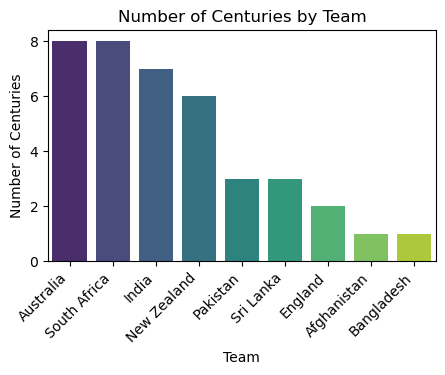

In [18]:
centuries_counts = centuries.groupby('Team').size().sort_values(ascending=False).reset_index(name='Number of Centuries')

plt.figure(figsize=(5, 3))
sns.barplot(x='Team', y='Number of Centuries', data=centuries_counts, palette='viridis')
plt.title('Number of Centuries by Team')
plt.xlabel('Team')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
#teams aginst which most century came

centuries.groupby('Against').size().sort_values(ascending=False).reset_index(name='Number of Centuries')

,Against,Number of Centuries
0,New Zealand,6
1,Bangladesh,5
2,Netherlands,5
3,Pakistan,5
4,Australia,4
5,Sri Lanka,4
6,England,3
7,India,3
8,Afghanistan,2
9,South Africa,2


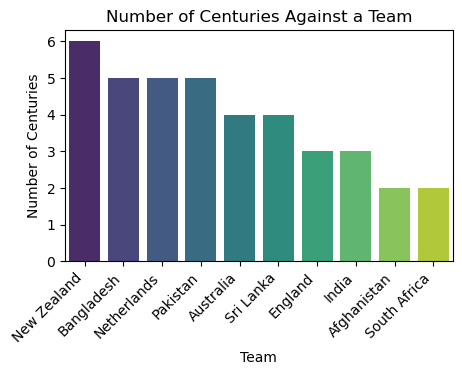

In [20]:
 centuries_counts2 = centuries.groupby('Against').size().sort_values(ascending=False).reset_index(name='Number of Centuries')

plt.figure(figsize=(5, 3))
sns.barplot(x='Against', y='Number of Centuries', data=centuries_counts2, palette='viridis')
plt.title('Number of Centuries Against a Team')
plt.xlabel('Team')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
#players who scored centurie and went not-out

centuries[ centuries['Out-by'] == "not out"]

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
11,Devon Conway,not out,152,121,147,19,3,125.61,New Zealand,England,61.842105,not out
13,Rachin Ravindra,not out,123,96,141,11,5,128.12,New Zealand,England,60.162602,not out
143,Mohammad Rizwan,not out,131,121,193,8,3,108.26,Pakistan,Sri Lanka,38.167939,not out
304,Virat Kohli,not out,103,97,113,6,4,106.18,India,Bangladesh,46.601942,not out
633,Fakhar Zaman,not out,126,81,103,8,11,155.55,Pakistan,New Zealand,77.777778,not out
659,Virat Kohli,not out,101,121,195,10,0,83.47,India,South Africa,39.603960,not out
696,Ibrahim Zadran,not out,129,143,217,8,3,90.20,Afghanistan,Australia,38.759690,not out
707,Glenn Maxwell,not out,201,128,181,21,10,157.03,Australia,Afghanistan,71.641791,not out
781,Mitchell Marsh,not out,177,132,177,17,9,134.09,Australia,Bangladesh,68.926554,not out
808,Shreyas Iyer,not out,128,94,145,10,5,136.17,India,Netherlands,54.687500,not out


In [22]:
#player who scored century but at a slow rate i.e took more balls and scored less runs.

centuries[centuries['SR']<100]

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
55,Rassie van der Dussen,c Samarawickrama b Wellalage,108,110,161,13,2,98.18,South Africa,Sri Lanka,59.259259,Wellalage
571,Quinton de Kock,c Phillips b Southee,114,116,176,10,3,98.27,South Africa,New Zealand,50.877193,Southee
659,Virat Kohli,not out,101,121,195,10,0,83.47,India,South Africa,39.603960,not out
696,Ibrahim Zadran,not out,129,143,217,8,3,90.20,Afghanistan,Australia,38.759690,not out
844,David Miller,c Head b Cummins,101,116,138,8,5,87.06,South Africa,Australia,61.386139,Cummins


In [23]:
#finding players who has most boundary percentage i.e. they score most runs though boundar (Power-Hitters)

centuries[ (centuries['R']>100) & (centuries['Boundary Percentage']>70)]

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
132,Kusal Mendis,c Imam-ul-Haq b Hasan Ali,122,77,124,14,6,158.44,Sri Lanka,Pakistan,75.409836,Hasan Ali
156,Rohit Sharma,b Rashid Khan,131,84,111,16,5,155.95,India,Afghanistan,71.755725,b Rashid Khan
308,Mitchell Marsh,c Usama Mir b Shaheen Shah Afridi,121,108,139,10,9,112.03,Australia,Pakistan,77.685950,Shaheen Shah Afridi
421,Glenn Maxwell,c Engelbrecht b van Beek,106,44,53,9,8,240.90,Australia,Netherlands,79.245283,van Beek
475,Travis Head,b Phillips,109,67,94,10,7,162.68,Australia,New Zealand,75.229358,b Phillips
633,Fakhar Zaman,not out,126,81,103,8,11,155.55,Pakistan,New Zealand,77.777778,not out
707,Glenn Maxwell,not out,201,128,181,21,10,157.03,Australia,Afghanistan,71.641791,not out


In [24]:
#finding pwerhitters i.e. player who makes most runs through boundaries and SR > 170

powerhitters = df[(df['Boundary Percentage'] > 75) & (df['SR'] >= 170) & (df['R'] >= 20) ]
powerhitters

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
62,Kusal Mendis,c †Klaasen b Rabada,76,42,55,4,8,180.95,Sri Lanka,South Africa,84.210526,Rabada
261,Aryan Dutt,not out,23,9,14,0,3,255.55,Netherlands,South Africa,78.260870,not out
365,Mark Wood,not out,43,17,25,2,5,252.94,England,South Africa,88.372093,not out
403,David Miller,not out,34,15,26,1,4,226.66,South Africa,Bangladesh,82.352941,not out
421,Glenn Maxwell,c Engelbrecht b van Beek,106,44,53,9,8,240.90,Australia,Netherlands,79.245283,van Beek
464,Quinton de Kock,c Mohammad Wasim b Shaheen Shah Afridi,24,14,19,5,0,171.42,South Africa,Pakistan,83.333333,Shaheen Shah Afridi
479,Glenn Maxwell,c Boult b Neesham,41,24,37,5,2,170.83,Australia,New Zealand,78.048780,Neesham
481,Pat Cummins,lbw b Boult,37,14,23,2,4,264.28,Australia,New Zealand,86.486486,Boult
704,Mitchell Marsh,lbw b Naveen-ul-Haq,24,11,22,2,2,218.18,Australia,Afghanistan,83.333333,Naveen-ul-Haq
734,Kusal Perera,c Santner b Ferguson,51,28,46,9,2,182.14,Sri Lanka,New Zealand,94.117647,Ferguson


In [25]:
# no. of powerhitters per team

powerhitters.groupby(["Team"])[['Batsmen']].size()

Team
Australia       4
England         1
India           1
Netherlands     1
South Africa    2
Sri Lanka       2
dtype: int64

In [26]:
india = df[ df['Team'] == "India"]
india

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
82,Rohit Sharma,lbw b Hazlewood,0,6,10,0,0,0.00,India,Australia,0.000000,Hazlewood
83,Ishan Kishan,c Green b Starc,0,1,3,0,0,0.00,India,Australia,0.000000,Starc
84,Virat Kohli,c Labuschagne b Hazlewood,85,116,171,6,0,73.27,India,Australia,28.235294,Hazlewood
85,Shreyas Iyer,c Warner b Hazlewood,0,3,2,0,0,0.00,India,Australia,0.000000,Hazlewood
86,KL Rahul,not out,97,115,180,8,2,84.34,India,Australia,45.360825,not out
...,...,...,...,...,...,...,...,...,...,...,...,...
865,Suryakumar Yadav,c †Inglis b Hazlewood,18,28,57,1,0,64.28,India,Australia,22.222222,Hazlewood
866,Mohammed Shami,c †Inglis b Starc,6,10,9,1,0,60.00,India,Australia,66.666667,Starc
867,Jasprit Bumrah,lbw b Zampa,1,3,5,0,0,33.33,India,Australia,0.000000,Zampa
868,Kuldeep Yadav,run out (Labuschagne/Cummins),10,18,28,0,0,55.55,India,Australia,0.000000,run out (Labuschagne/Cummins)


In [27]:
teamindia = india.groupby('Batsmen')[["R","B","4s","6s","SR"]].agg({"R":"sum","B":"sum","4s":"sum","6s":"sum","SR":"mean"})
teamindia.sort_values(by="R",ascending=False)

,R,B,4s,6s,SR
Batsmen,,,,,
Virat Kohli,765,847,68,9,83.206364
Rohit Sharma,597,474,66,31,127.897273
Shreyas Iyer,530,468,37,24,96.670909
KL Rahul,452,498,38,9,96.785000
Shubman Gill,354,331,41,12,103.162222
Ravindra Jadeja,120,118,7,3,106.044000
Suryakumar Yadav,106,105,12,1,108.428571
Ishan Kishan,47,48,5,2,50.000000
Kuldeep Yadav,19,31,1,0,62.390000


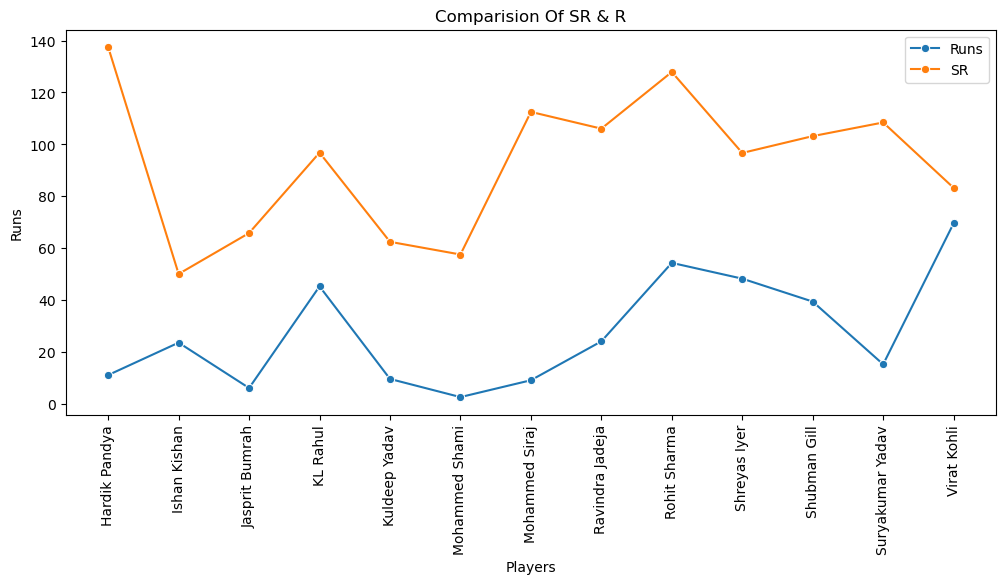

In [28]:
#comparing strike rate and run of each team player.

teamindiaavg = india.groupby('Batsmen')[["R","B","4s","6s","SR"]].agg({"R":"mean","B":"sum","4s":"sum","6s":"sum","SR":"mean"})
plt.figure(figsize=(12, 5))

sns.lineplot(data=teamindiaavg,x=teamindiaavg.index,y='R',label="Runs",marker="o")
sns.lineplot(data=teamindiaavg,x=teamindiaavg.index,y='SR',label="SR",marker="o")
plt.xticks(rotation=90)
plt.title("Comparision Of SR & R")
plt.xlabel("Players")
plt.ylabel("Runs")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x400 with 0 Axes>

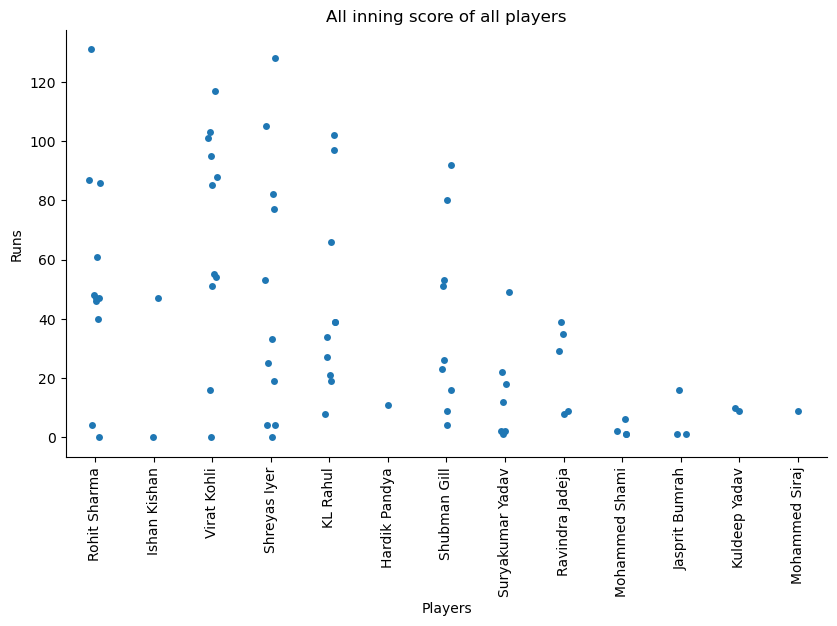

In [29]:
#displaying all the innings of each players

plt.figure(figsize=(20,4))
sns.catplot(data=india,x="Batsmen",y="R",aspect=1.75)
plt.title("All inning score of all players")
plt.ylabel("Runs")
plt.xlabel("Players")
plt.xticks(rotation=90)
plt.show()

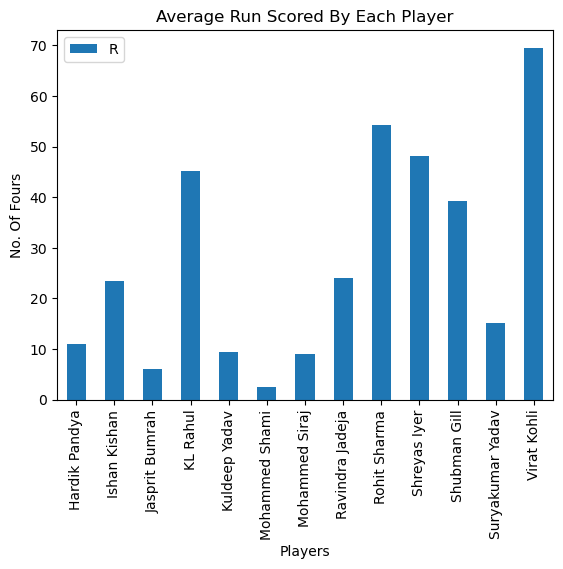

In [30]:
#finding team batting report

india.groupby("Batsmen")[['R']].mean().plot.bar()
plt.title("Average Run Scored By Each Player")
plt.ylabel("No. Of Fours")
plt.xlabel("Players")
plt.show()

**It can be observed that Virat Kohli and Rohit Sharma boast the highest batting averages in the tournament for Team India.**

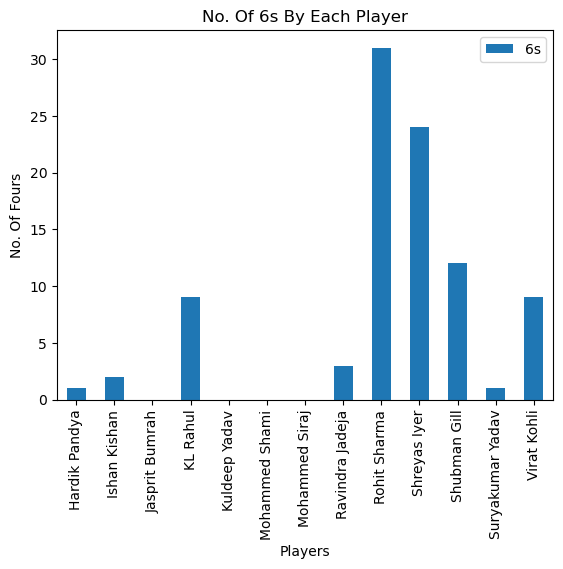

In [31]:
#finding team batting report - 6s

india.groupby("Batsmen")[['6s']].sum().plot.bar()
plt.title("No. Of 6s By Each Player")
plt.ylabel("No. Of Fours")
plt.xlabel("Players")
plt.show()

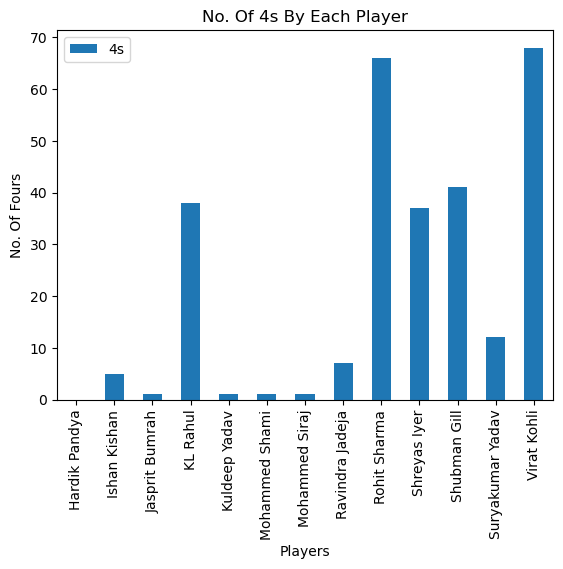

In [32]:
#finding team batting report - 4s

india.groupby("Batsmen")[['4s']].sum().plot.bar()
plt.title("No. Of 4s By Each Player")
plt.ylabel("No. Of Fours")
plt.xlabel("Players")
plt.show()

In [33]:
#finding all the players who got golden duck in the tournament

goldenduck = df[ (df["R"]==0) & (df['B']==1) ]
goldenduck

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
12,Will Young,c †Buttler b Curran,0,1,5,0,0,0.0,New Zealand,England,0.0,Curran
22,Hasan Ali,lbw b de Leede,0,1,2,0,0,0.0,Pakistan,Netherlands,0.0,de Leede
67,Dunith Wellalage,c †Klaasen b Coetzee,0,1,2,0,0,0.0,Sri Lanka,South Africa,0.0,Coetzee
83,Ishan Kishan,c Green b Starc,0,1,3,0,0,0.0,India,Australia,0.0,Starc
113,Liam Livingstone,b Shoriful Islam,0,1,1,0,0,0.0,England,Bangladesh,0.0,b Shoriful Islam
121,Najmul Hossain Shanto,c Livingstone b Topley,0,1,1,0,0,0.0,Bangladesh,England,0.0,Topley
167,Kagiso Rabada,not out,0,1,4,0,0,0.0,South Africa,Australia,0.0,not out
180,Litton Das,c Henry b Boult,0,1,1,0,0,0.0,Bangladesh,New Zealand,0.0,Boult
290,Naveen-ul-Haq,c Chapman b Santner,0,1,1,0,0,0.0,Afghanistan,New Zealand,0.0,Santner
309,Glenn Maxwell,c Babar Azam b Shaheen Shah Afridi,0,1,1,0,0,0.0,Australia,Pakistan,0.0,Shaheen Shah Afridi


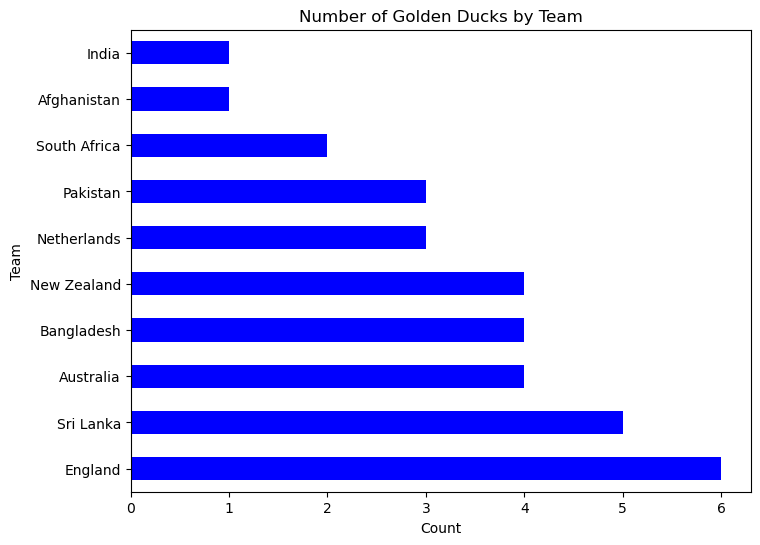

In [34]:
#golden duck per team

gd = goldenduck.groupby("Team")['Batsmen'].size().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
gd.plot(kind='barh', color='blue')
plt.xlabel('Count')
plt.ylabel('Team')
plt.title('Number of Golden Ducks by Team')
plt.show()

In [35]:
#total runs by a team in the tournament

team_run = df.groupby("Team")["R"].sum().sort_values()
team_run

Team
Netherlands     1728
Sri Lanka       1942
Bangladesh      1944
Afghanistan     1990
England         2135
Pakistan        2220
New Zealand     2712
South Africa    2773
Australia       2945
India           3038
Name: R, dtype: int32

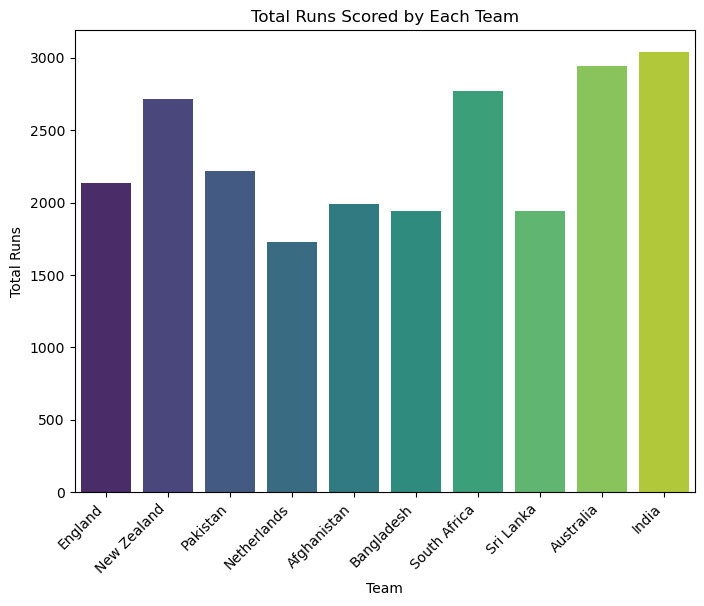

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Team', y='R', data=df, estimator=sum, palette='viridis',errorbar=None)
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Runs')
plt.show()

In [37]:
#finding scoreboard of a particular innings and finding batting contributions

inngs_per = df[ (df['Team'] == "India") & (df['Against'] == "England") ][["Batsmen","R","Against"]]
inngs_per

,Batsmen,R,Against
518,Rohit Sharma,87,England
519,Shubman Gill,9,England
520,Virat Kohli,0,England
521,Shreyas Iyer,4,England
522,KL Rahul,39,England
523,Suryakumar Yadav,49,England
524,Ravindra Jadeja,8,England
525,Mohammed Shami,1,England
526,Jasprit Bumrah,16,England
527,Kuldeep Yadav,9,England


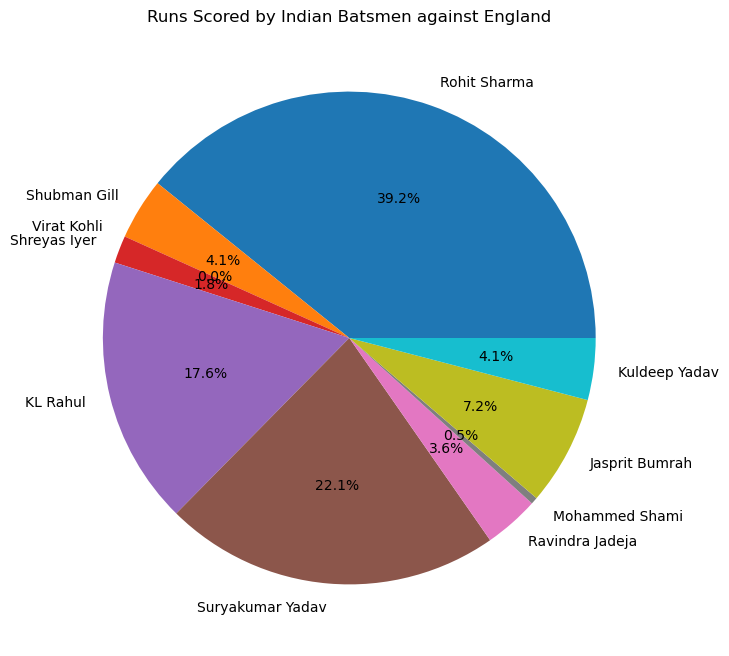

In [38]:
#Determining the batting input of each player in an innings.

plt.figure(figsize=(8, 8))
plt.pie(inngs_per['R'], labels=inngs_per['Batsmen'], autopct='%1.1f%%')
plt.title('Runs Scored by Indian Batsmen against England')
plt.show()

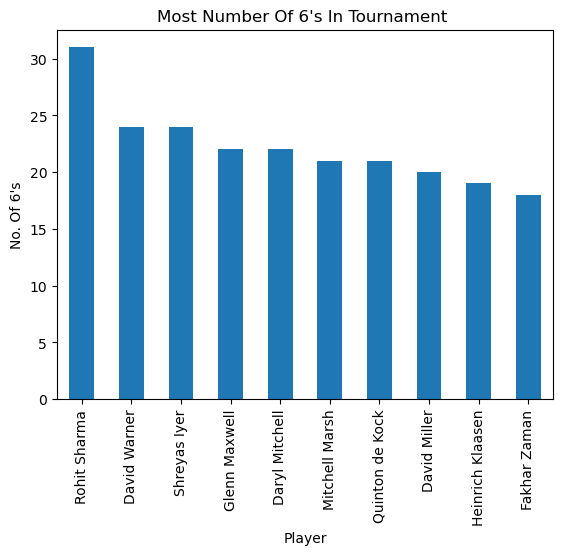

In [39]:
#Identify the top 10 players who have hit the most 6's in the tournament. 

df.groupby('Batsmen')['6s'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel("Player")
plt.ylabel("No. Of 6's")
plt.title("Most Number Of 6's In Tournament ")
plt.show()

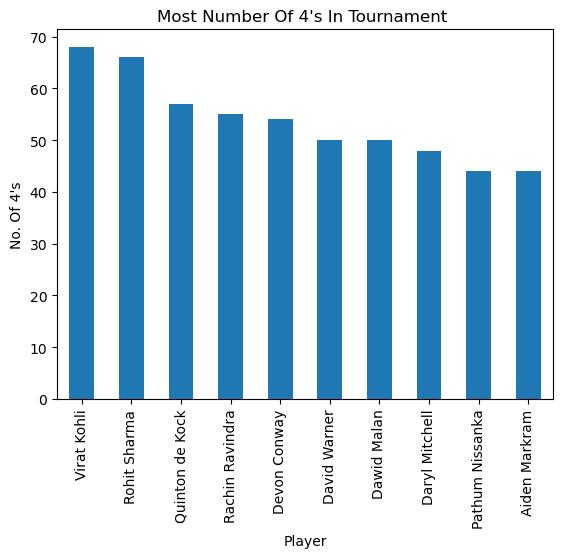

In [40]:
#Identify the top 10 players who have hit the most 4's in the tournament.

df.groupby('Batsmen')['4s'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel("Player")
plt.ylabel("No. Of 4's")
plt.title("Most Number Of 4's In Tournament ")
plt.show()

In [41]:
#finding player with highest strike rate in the tournament

strike_rate = df[ df['B']>20 ].sort_values(by="SR",ascending=False).head(10)
strike_rate

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
421,Glenn Maxwell,c Engelbrecht b van Beek,106,44,53,9,8,240.90,Australia,Netherlands,79.245283,van Beek
56,Aiden Markram,c Rajitha b Madushanka,106,54,84,14,3,196.29,South Africa,Sri Lanka,69.811321,Madushanka
58,David Miller,not out,39,21,36,3,2,185.71,South Africa,Sri Lanka,61.538462,not out
402,Heinrich Klaasen,c Mahmudullah b Hasan Mahmud,90,49,94,2,8,183.67,South Africa,Bangladesh,62.222222,Hasan Mahmud
734,Kusal Perera,c Santner b Ferguson,51,28,46,9,2,182.14,Sri Lanka,New Zealand,94.117647,Ferguson
62,Kusal Mendis,c †Klaasen b Rabada,76,42,55,4,8,180.95,Sri Lanka,South Africa,84.210526,Rabada
353,Marco Jansen,not out,75,42,72,3,6,178.57,South Africa,England,64.000000,not out
574,David Miller,c Mitchell b Neesham,53,30,48,2,4,176.66,South Africa,New Zealand,60.377358,Neesham
479,Glenn Maxwell,c Boult b Neesham,41,24,37,5,2,170.83,Australia,New Zealand,78.048780,Neesham
364,Gus Atkinson,b Maharaj,35,21,31,7,0,166.66,England,South Africa,80.000000,b Maharaj


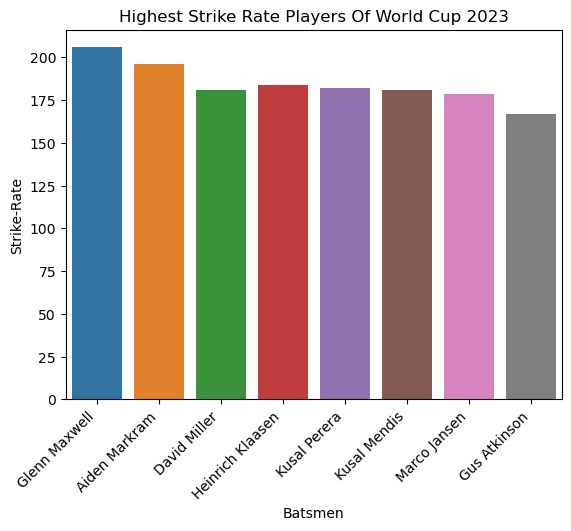

In [42]:
sns.barplot(data=strike_rate,x="Batsmen",y="SR",errorbar=None)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Batsmen")
plt.ylabel("Strike-Rate")
plt.title("Highest Strike Rate Players Of World Cup 2023")
plt.show()

In [43]:
#finding out wickets taken by a particualar bowler

siraj = df[ (df['Bowled-by'] == "b Mohammed Siraj") | (df['Bowled-by'] == "Mohammed Siraj") ][['Batsmen','Team']]
shami = df[ df['Bowled-by'].str.contains("Mohammed Shami") ][['Batsmen','Team']]
bumrah = df[ (df['Bowled-by'] == "b Bumrah") | (df['Bowled-by'] == "Bumrah") ][['Batsmen','Team']]
shami

,Batsmen,Team
368,Will Young,New Zealand
369,Rachin Ravindra,New Zealand
370,Daryl Mitchell,New Zealand
374,Mitchell Santner,New Zealand
375,Matt Henry,New Zealand
528,Jonny Bairstow,England
531,Ben Stokes,England
533,Moeen Ali,England
537,Adil Rashid,England
601,Charith Asalanka,Sri Lanka


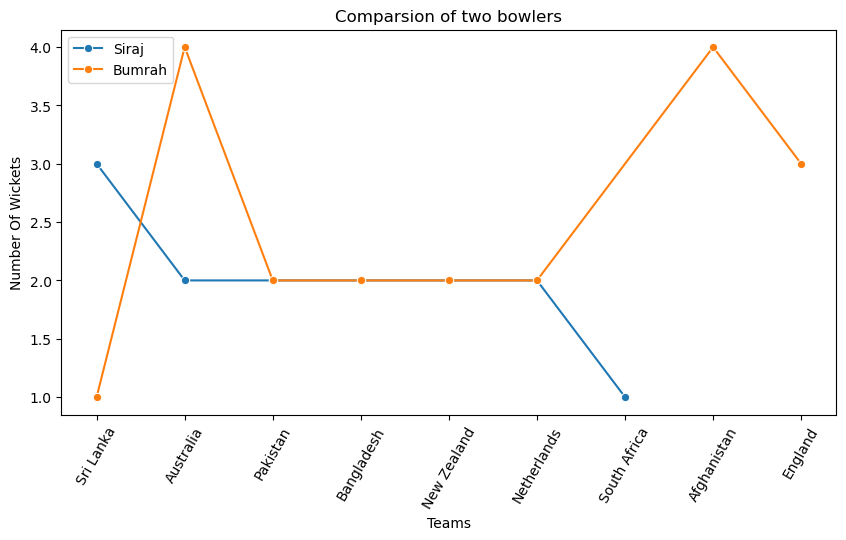

In [44]:
#comparing two bowlers wickets in against all teams in the tournamnet

siraj_w_count= siraj['Team'].value_counts()
bumrah_w_count = bumrah['Team'].value_counts()
#shami_w_count = shami['Team'].value_counts()

plt.figure(figsize=(10,5))
sns.lineplot(x=siraj_w_count.index,y=siraj_w_count.values,marker="o",label="Siraj")
sns.lineplot(x=bumrah_w_count.index,y=bumrah_w_count.values,marker="o",label="Bumrah")
#sns.lineplot(x=shami_w_count.index,y=shami_w_count.values,marker="o",label="Shami")
plt.xticks(rotation=60)
plt.title("Comparsion of two bowlers")
plt.ylabel("Number Of Wickets")
plt.xlabel("Teams")
plt.show()

In [45]:
#finding out player who got run out and then per country

runouts = df[ df['Out-by'].str.contains("run out")]
runout_count = runouts.groupby("Team").size().sort_values(ascending=False)

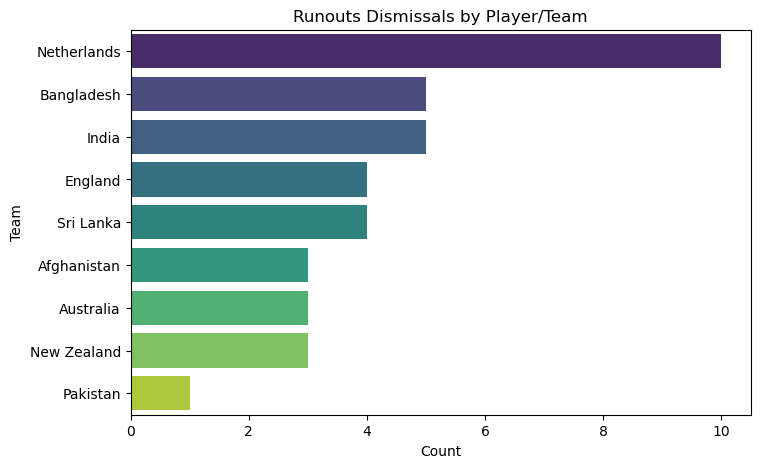

In [46]:
plt.figure(figsize=(8, 5))
sns.barplot(x=runout_count.values, y=runout_count.index, palette="viridis")
plt.xlabel('Count')
plt.ylabel('Team')
plt.title('Runouts Dismissals by Player/Team')
plt.show()

In [47]:
#LBWs player who got lbw and then per country

lbws = df[ df['Out-by'].str.contains("lbw")]
lbw_count = lbws.groupby("Team").size().sort_values(ascending=False)

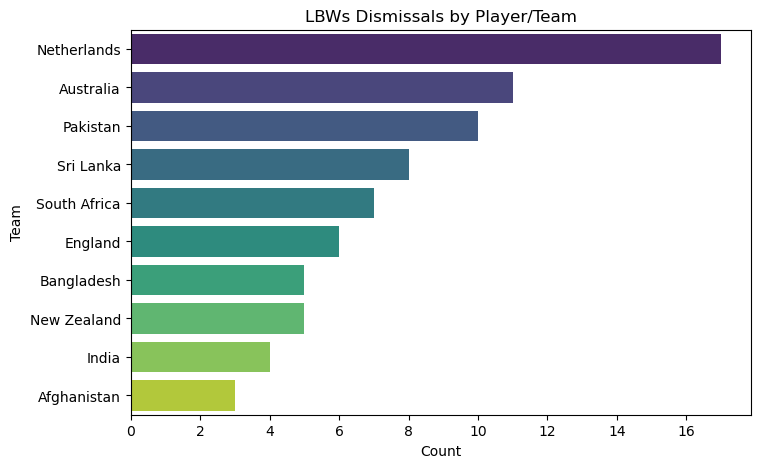

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(x=lbw_count.values, y=lbw_count.index, palette="viridis")
plt.xlabel('Count')
plt.ylabel('Team')
plt.title('LBWs Dismissals by Player/Team')
plt.show()

In [49]:
df.head()

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
0,Jonny Bairstow,c Mitchell b Santner,33,35,57,4,1,94.28,England,New Zealand,66.666667,Santner
1,Dawid Malan,c †Latham b Henry,14,24,36,2,0,58.33,England,New Zealand,57.142857,Henry
2,Joe Root,b Phillips,77,86,140,4,1,89.53,England,New Zealand,28.571429,b Phillips
3,Harry Brook,c Conway b Ravindra,25,16,20,4,1,156.25,England,New Zealand,88.000000,Ravindra
4,Moeen Ali,b Phillips,11,17,20,1,0,64.70,England,New Zealand,36.363636,b Phillips


# Bowling Analysis

In [50]:
def get_bowler(x):
    for i in x:
        out = i.split(" b ")
        
        if len(out) == 1:
            if "not out" in i:
                return "-"
            else:
                return out[0]
        else:
            return out[1]

In [51]:
df2 = pd.read_excel("batsmens2222222.xlsx")

In [52]:
df2['Bowler'] = df2['Out-by'].apply(get_bowler)

In [53]:
df2

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Bowler
0,Jonny Bairstow,c Mitchell b Santner,33,35,57,4,1,94.28,England,New Zealand,c
1,Dawid Malan,c †Latham b Henry,14,24,36,2,0,58.33,England,New Zealand,c
2,Joe Root,b Phillips,77,86,140,4,1,89.53,England,New Zealand,
3,Harry Brook,c Conway b Ravindra,25,16,20,4,1,156.25,England,New Zealand,c
4,Moeen Ali,b Phillips,11,17,20,1,0,64.70,England,New Zealand,
...,...,...,...,...,...,...,...,...,...,...,...
871,Travis Head,c Shubman Gill b Mohammed Siraj,137,120,166,15,4,114.16,Australia,India,c
872,Mitchell Marsh,c †Rahul b Bumrah,15,15,15,1,1,100.00,Australia,India,c
873,Steven Smith,lbw b Bumrah,4,9,11,1,0,44.44,Australia,India,l
874,Marnus Labuschagne,not out,58,110,133,4,0,52.72,Australia,India,n
